In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [105]:
df = pd.read_csv('/home/vimalkumar/Downloads/archive (3)/petrol_data.csv',
                index_col=0,parse_dates = True)
df = df.iloc[:,:1]
df

,rate
date,
2016-07-01,70.75
2016-07-15,68.43
2016-08-01,67.06
2016-08-15,66.08
2016-09-01,69.56
...,...
2021-02-25,97.60
2021-02-26,97.60
2021-02-27,97.85


In [106]:
x = df.values
x

array([[70.75 ],
       [68.43 ],
       [67.06 ],
       [66.08 ],
       [69.56 ],
       [70.35 ],
       [70.73 ],
       [70.84 ],
       [72.63 ],
       [73.98 ],
       [72.19 ],
       [72.37 ],
       [75.3  ],
       [77.01 ],
       [77.56 ],
       [77.3  ],
       [72.9  ],
       [74.73 ],
       [71.9  ],
       [73.54 ],
       [72.   ],
       [71.15 ],
       [71.04 ],
       [70.01 ],
       [69.77 ],
       [69.55 ],
       [70.27 ],
       [77.7  ],
       [70.62 ],
       [71.01 ],
       [71.64 ],
       [72.94 ],
       [74.26 ],
       [74.87 ],
       [75.44 ],
       [75.95 ],
       [76.64 ],
       [76.86 ],
       [76.75 ],
       [77.22 ],
       [74.68 ],
       [74.72 ],
       [74.56 ],
       [74.88 ],
       [75.36 ],
       [76.06 ],
       [76.13 ],
       [75.85 ],
       [75.61 ],
       [75.58 ],
       [75.45 ],
       [75.52 ],
       [75.97 ],
       [76.32 ],
       [76.91 ],
       [76.34 ],
       [76.79 ],
       [76.84 ],
       [76.91 

# Checking Stationary

<AxesSubplot:xlabel='date'>

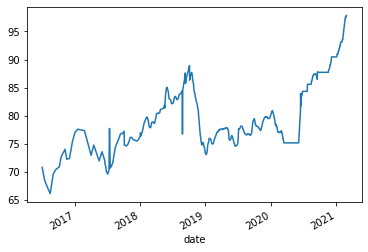

In [107]:
df['rate'].plot()

### By Visually we can say that this is not stationary

In [108]:
from statsmodels.tsa.stattools import adfuller

In [109]:
df_test = adfuller(df['rate'],autolag = 'AIC')
df_test

(-0.9374049531906761,
 0.775405061985406,
 21,
 850,
 {'1%': -3.438066656679015,
  '5%': -2.8649462783472424,
  '10%': -2.5685837702422147},
 1459.4528784601744)

In [110]:
if df_test[1] > 0.05:
    print('This is Stationary')
else:
    print('This is not Stationary')

This is Stationary


### This is stationary because the p value is greater than 5% level of significance

In [111]:
df['rate_diff'] = df['rate'].diff()
df.head()

,rate,rate_diff
date,,
2016-07-01,70.75,NaN
2016-07-15,68.43,-2.32
2016-08-01,67.06,-1.37
2016-08-15,66.08,-0.98
2016-09-01,69.56,3.48


In [112]:
df = df.iloc[1:,:]
df.head()

,rate,rate_diff
date,,
2016-07-15,68.43,-2.32
2016-08-01,67.06,-1.37
2016-08-15,66.08,-0.98
2016-09-01,69.56,3.48
2016-09-15,70.35,0.79


<AxesSubplot:xlabel='date'>

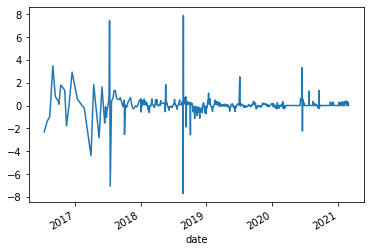

In [113]:
df['rate_diff'].plot()

In [116]:
df_test1 = adfuller(df['rate_diff'],autolag = 'AIC')
df_test1

(-5.407305699423873,
 3.2695603027470324e-06,
 20,
 850,
 {'1%': -3.438066656679015,
  '5%': -2.8649462783472424,
  '10%': -2.5685837702422147},
 1457.2868354759103)

In [117]:
if df_test1[1] > 0.05:
    print('This is Stationary')
else:
    print('This is not Stationary')

This is not Stationary


In [122]:
df.columns

Index(['rate', 'rate_diff'], dtype='object')

# Now using Integrated Difference of 1 this becomes stationary

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/home/vimalkumar/Documents/Python_new_1/cde_venv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


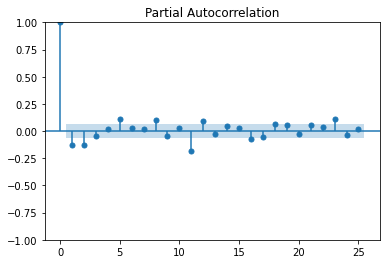

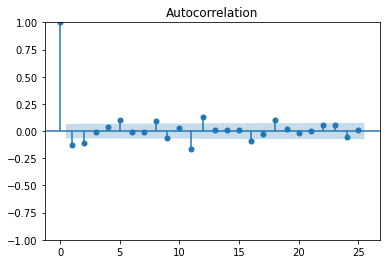

In [31]:
pacf = plot_pacf(df['rate_diff'],lags=25)
acf = plot_acf(df['rate_diff'],lags=25)


# Splitting data into train and test

In [32]:
train = x[:len(x)-10]
test = x[len(x)-10:]

In [33]:
train.shape

(862, 1)

In [34]:
test.shape

(10, 1)

In [56]:
model = AutoReg(train,lags=10).fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  862
Model:                    AutoReg(10)   Log Likelihood                -818.957
Method:               Conditional MLE   S.D. of innovations              0.633
Date:                Tue, 23 Nov 2021   AIC                           1661.915
Time:                        17:01:56   BIC                           1718.886
Sample:                            10   HQIC                          1683.735
                                  862                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1839      0.317      0.580      0.562      -0.438       0.806
y.L1           0.8297      0.034     24.307      0.000       0.763       0.897
y.L2           0.0340      0.044      0.770      0.441      -0.053       0.121
y.L3           0.0912      0.044      2.069      0.039       0.005       0.178
y.L4           0.0643      0.044      1.454      0.146      -0.022       0.151
y.L5           0.0966      0.044      2.187      0.029       0.010       0.183
y.L6          -0.0620      0.044     -1.405      0.160      -0.148       0.024
y.L7          -0.0154      0.043     -0.354      0.723      -0.101       0.070
y.L8           0.0612      0.043      1.410      0.159      -0.024       0.146
y.L9          -0.1305      0.043     -3.010      0.003      -0.216      -0.046
y.L10          0.0290      0.033      0.877      0.380      -0.036       0.094
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.3228           -0.0000j            1.3228           -0.5000
AR.2            -0.9320           -0.8435j            1.2570           -0.3829
AR.3            -0.9320           +0.8435j            1.2570            0.3829
AR.4            -0.0544           -1.3178j            1.3190           -0.2566
AR.5            -0.0544           +1.3178j            1.3190            0.2566
AR.6             0.7346           -1.1271j            1.3454           -0.1581
AR.7             0.7346           +1.1271j            1.3454            0.1581
AR.8             1.0019           -0.0000j            1.0019           -0.0000
AR.9             1.2986           -0.0000j            1.2986           -0.0000
AR.10            4.0310           -0.0000j            4.0310           -0.0000
------------------------------------------------------------------------------
"""

# Making Predictions and Comparing results on test set

In [58]:
pred = model.predict(start=len(train),end=len(x)-1,dynamic=False)

array([96.83595522, 96.87075591, 96.93686415, 97.00995241, 97.0729235 ,
       97.09150395, 97.11720258, 97.13602072, 97.12859562, 97.14140044])

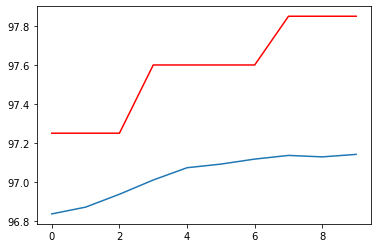

In [59]:
plt.plot(pred)
plt.plot(test,color='red')
pred

In [60]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test,pred))
rmse

0.5534658639864579

# Since root mean squared error is very less

# Future Predictions

In [88]:
pred_dates = pd.date_range(start='2021-03-02',end='2021-03-16')
print(pred_dates)
print(type(pred_dates))
pred_future = model.predict(start = len(df)+1 , end = len(df)+15)
pred_future

DatetimeIndex(['2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05',
               '2021-03-06', '2021-03-07', '2021-03-08', '2021-03-09',
               '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-13',
               '2021-03-14', '2021-03-15', '2021-03-16'],
              dtype='datetime64[ns]', freq='D')
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


array([97.14140044, 97.15071004, 97.15661255, 97.15868272, 97.15502784,
       97.15558173, 97.15503989, 97.15203904, 97.15133482, 97.14874483,
       97.1460284 , 97.14302477, 97.13957106, 97.13688632, 97.13372087])

In [99]:
#array_1 = np.array(pred_dates)
array_2 = np.array(pred_future)
dataset = pd.DataFrame({'dates': pred_dates, 'prediction': list(array_2)}, columns=['dates', 'prediction'])
dataset

,dates,prediction
0,2021-03-02,97.141400
1,2021-03-03,97.150710
2,2021-03-04,97.156613
3,2021-03-05,97.158683
4,2021-03-06,97.155028
5,2021-03-07,97.155582
6,2021-03-08,97.155040
7,2021-03-09,97.152039
8,2021-03-10,97.151335
9,2021-03-11,97.148745


In [100]:
dd = df['rate'].iloc[len(df)-50:]
dd

date
2021-01-11    90.99
2021-01-12    90.99
2021-01-13    91.24
2021-01-14    91.49
2021-01-15    91.49
2021-01-16    91.49
2021-01-17    91.49
2021-01-18    91.74
2021-01-19    92.00
2021-01-20    92.00
2021-01-21    92.00
2021-01-22    92.25
2021-01-23    92.50
2021-01-24    92.50
2021-01-25    92.50
2021-01-26    92.85
2021-01-27    93.10
2021-01-28    93.10
2021-01-29    93.10
2021-01-30    93.10
2021-01-31    93.10
2021-02-01    93.10
2021-02-02    93.10
2021-02-03    93.10
2021-02-04    93.30
2021-02-05    93.60
2021-02-06    93.60
2021-02-07    93.60
2021-02-08    93.60
2021-02-09    93.96
2021-02-10    94.26
2021-02-11    94.51
2021-02-12    94.80
2021-02-13    95.10
2021-02-14    95.39
2021-02-15    95.65
2021-02-16    95.96
2021-02-17    96.21
2021-02-18    96.55
2021-02-19    96.86
2021-02-20    97.25
2021-02-21    97.25
2021-02-22    97.25
2021-02-23    97.60
2021-02-24    97.60
2021-02-25    97.60
2021-02-26    97.60
2021-02-27    97.85
2021-02-28    97.85
2021-03-01    9

In [96]:
dataset

,dates,prediction
0,2021-03-02,97.141400
1,2021-03-03,97.150710
2,2021-03-04,97.156613
3,2021-03-05,97.158683
4,2021-03-06,97.155028
5,2021-03-07,97.155582
6,2021-03-08,97.155040
7,2021-03-09,97.152039
8,2021-03-10,97.151335
9,2021-03-11,97.148745


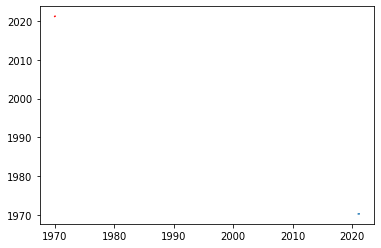

In [97]:
plt.plot(df['rate'].iloc[len(df)-50:])
plt.plot(dataset,color='red')

In [102]:
df['rate_diff']

date
2016-08-01   -1.37
2016-08-15   -0.98
2016-09-01    3.48
2016-09-15    0.79
2016-10-01    0.38
              ... 
2021-02-25    0.00
2021-02-26    0.00
2021-02-27    0.25
2021-02-28    0.00
2021-03-01    0.00
Name: rate_diff, Length: 870, dtype: float64